# Predicting Cost of Used Cars

## Importing Data

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [257]:
data = pd.read_excel('Data_Train.xlsx')

In [258]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Comments on Missing Values**
- **Mileage, Engine, Power and Seats** : all are continous numeric features
- **New price** : Sparse feature
<br>
Therefore, the numeric feature will be treated either by their mean/mode <br>
New price will be sparse

# Some EDA

### Name Feature

In [259]:
data["Name"].value_counts()

Mahindra XUV500 W8 2WD                           49
Maruti Swift VDI                                 45
Maruti Swift Dzire VDI                           34
Honda City 1.5 S MT                              34
Maruti Swift VDI BSIV                            31
Maruti Ritz VDi                                  30
Hyundai i10 Sportz                               30
Toyota Fortuner 3.0 Diesel                       29
Honda Amaze S i-Dtech                            27
Hyundai Grand i10 Sportz                         27
Maruti Ertiga VDI                                25
Honda Brio S MT                                  25
Honda City 1.5 V MT                              24
Hyundai Verna 1.6 SX                             23
Maruti Wagon R VXI                               23
Maruti Wagon R LXI                               22
Maruti Alto LXi                                  21
Hyundai EON Era Plus                             20
Skoda Superb Elegance 1.8 TSI AT                 20
Maruti Alto 

In [260]:
len(data['Name'].unique())

1876

**Comment**: Each sample is given different car name. Will have to clean this text data

## Location Feature

Text(0,0.5,'Avg Price')

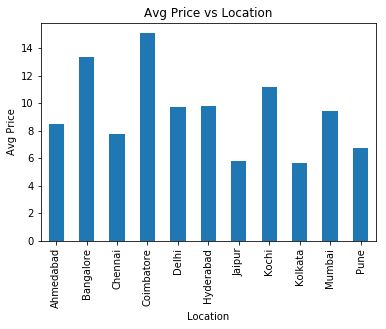

In [261]:
data.groupby('Location')['Price'].mean().plot.bar()
plt.title('Avg Price vs Location')
plt.ylabel('Avg Price')

Text(0,0.5,'Avg Kilometers')

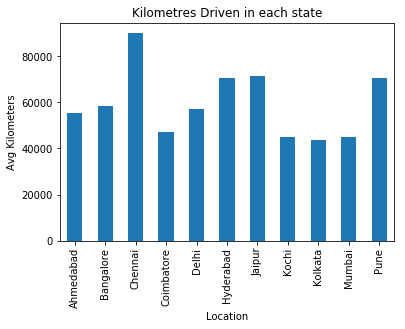

In [262]:
data.groupby('Location')['Kilometers_Driven'].mean().plot.bar()
plt.title('Kilometres Driven in each state')
plt.ylabel('Avg Kilometers')

## Kilometers Driven Feature

**Comment** Kilometers driven has inverse relation with Price

In [263]:
data[['Kilometers_Driven','Price']].corr()

,Kilometers_Driven,Price
Kilometers_Driven,1.000000,-0.011493
Price,-0.011493,1.000000


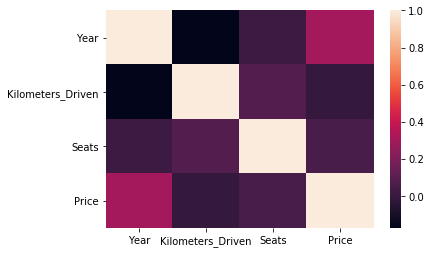

In [264]:
import seaborn as sns
sns.heatmap(data.corr())

## Fuel Type feature

Text(0,0.5,'Price')

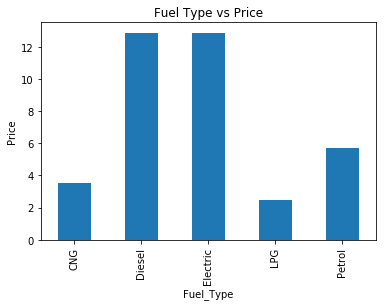

In [265]:
data.groupby('Fuel_Type')['Price'].mean().plot.bar()
plt.title('Fuel Type vs Price')
plt.ylabel('Price')

## Year Feature

Text(0,0.5,'Price')

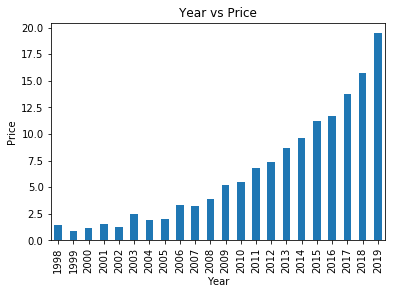

In [266]:
data.groupby('Year')['Price'].mean().plot.bar()
plt.title('Year vs Price')
plt.ylabel('Price')

## Transmission Feature

Text(0,0.5,'Price')

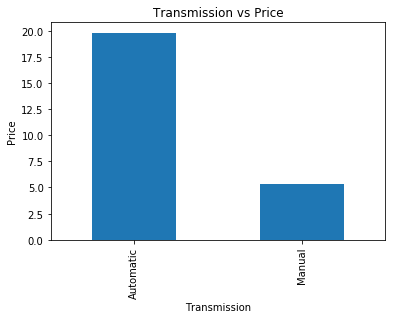

In [267]:
data.groupby('Transmission')['Price'].mean().plot.bar()
plt.title('Transmission vs Price')
plt.ylabel('Price')

## Owner Type Feature

Text(0,0.5,'Price')

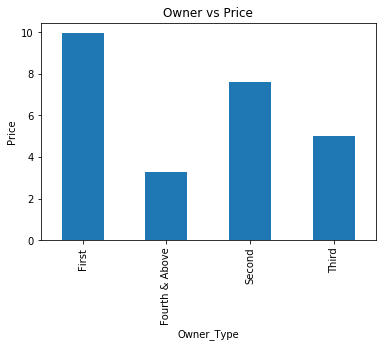

In [268]:
data.groupby('Owner_Type')['Price'].mean().plot.bar()
plt.title('Owner vs Price')
plt.ylabel('Price')

## Splitting Data

In [269]:
new_data = data.copy()

In [270]:
y = new_data["Price"].values

In [271]:
X = new_data.drop('Price', axis= 'columns')

In [272]:
X.shape

(6019, 12)

In [273]:
y.shape

(6019,)

In [274]:
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [277]:
X_train.shape, y_train.shape

((4213, 12), (4213,))

In [278]:
X_val.shape, y_val.shape

((1806, 12), (1806,))

# Preprocessing Training Data

## Observing Missing Values

In [279]:
X_train.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
dtype: bool

# 1. Mileage Feature

In [280]:
X_train['Mileage']

523      25.4 kmpl
5989    18.25 kmpl
4565     17.8 kmpl
538      17.8 kmpl
253      18.7 kmpl
1423     19.0 kmpl
3754     13.5 kmpl
423     15.26 kmpl
1446     11.7 kmpl
393      21.1 kmpl
2        18.2 kmpl
2323    25.0 km/kg
5904     22.7 kmpl
3551     14.4 kmpl
5410    11.74 kmpl
1490     17.6 kmpl
816      17.0 kmpl
1996     17.0 kmpl
5644    20.14 kmpl
3016    13.93 kmpl
3030    22.69 kmpl
4669    16.77 kmpl
3963     13.7 kmpl
5941    25.17 kmpl
1608    20.51 kmpl
1918    16.55 kmpl
476      18.9 kmpl
3109    17.01 kmpl
599     11.36 kmpl
4459     23.1 kmpl
           ...    
1375     16.8 kmpl
1326     22.7 kmpl
3780    11.68 kmpl
5208    21.14 kmpl
1349    18.88 kmpl
255     16.38 kmpl
4988    18.59 kmpl
3642     18.0 kmpl
3622    13.01 kmpl
4147     28.4 kmpl
4971    21.43 kmpl
5034     17.7 kmpl
5222     17.4 kmpl
5315    12.05 kmpl
2727    21.19 kmpl
3700     17.0 kmpl
124      21.9 kmpl
2778    11.18 kmpl
2879    18.53 kmpl
5167    16.02 kmpl
2773     17.0 kmpl
2635     17.

In [281]:
mileage_df = X_train['Mileage'].str.split(" ", expand = True)

In [282]:
mileage_df.head()

,0,1
523,25.4,kmpl
5989,18.25,kmpl
4565,17.8,kmpl
538,17.8,kmpl
253,18.7,kmpl


In [283]:
mileage_df[1].value_counts()

kmpl     4164
km/kg      47
Name: 1, dtype: int64

In [284]:
#Adding two columns
mileage_df['Mileage_kmpl'] = np.nan
mileage_df['Mileage_km/kg'] = np.nan

#Filling these two columns
mileage_df.loc[mileage_df[1]=='kmpl', 'Mileage_kmpl'] = mileage_df.loc[mileage_df[1] == 'kmpl', 0]
mileage_df.loc[mileage_df[1]=='km/kg', 'Mileage_km/kg'] = mileage_df.loc[mileage_df[1] == 'km/kg', 0]

In [285]:
mileage_df.head()

,0,1,Mileage_kmpl,Mileage_km/kg
523,25.4,kmpl,25.4,NaN
5989,18.25,kmpl,18.25,NaN
4565,17.8,kmpl,17.8,NaN
538,17.8,kmpl,17.8,NaN
253,18.7,kmpl,18.7,NaN


In [286]:
mileage_df.drop([0,1], axis = 'columns', inplace = True)
X_train = pd.concat([X_train, mileage_df], axis = 'columns')

In [287]:
X_train.drop('Mileage', axis = 'columns', inplace = True)

In [288]:
X_train[['Mileage_kmpl', 'Mileage_km/kg']] = X_train[['Mileage_kmpl', 'Mileage_km/kg']].astype(float)

In [289]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,624 CC,37.5 bhp,4.0,NaN,25.40,NaN
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,1968 CC,187.74 bhp,5.0,53.14 Lakh,18.25,NaN
4565,Chevrolet Beat LT,Delhi,2010,54000,Petrol,Manual,Second,1199 CC,76.8 bhp,5.0,NaN,17.80,NaN
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2012,107000,Diesel,Manual,First,1399 CC,67 bhp,5.0,NaN,17.80,NaN
253,Honda Jazz 1.2 VX i VTEC,Coimbatore,2017,49575,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,NaN,18.70,NaN


### Treating Missing values in Mileage

In [290]:
X_train[X_train['Mileage_kmpl'].isnull() & X_train['Mileage_km/kg'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,1798 CC,73 bhp,5.0,NaN,NaN,NaN
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,72 CC,41 bhp,5.0,13.58 Lakh,NaN,NaN


**Comments**: No missing values in Mileage now (as Electric type has no fuel)

### Plotting Mileage Feature

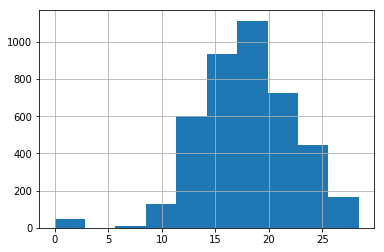

In [291]:
X_train['Mileage_kmpl'].hist()

In [292]:
X_train['Mileage_kmpl'].describe()

count    4164.000000
mean       18.017166
std         4.462597
min         0.000000
25%        15.100000
50%        18.000000
75%        20.890000
max        28.400000
Name: Mileage_kmpl, dtype: float64

In [293]:
mileage_mean = X_train['Mileage_kmpl'].mean()

### Need to remove zeros in Mileage

In [294]:
X_train[X_train['Mileage_kmpl'] == 0.0].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,2179 CC,115 bhp,5.0,NaN,0.0,NaN
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,1086 CC,null bhp,5.0,NaN,0.0,NaN
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,1968 CC,null bhp,5.0,NaN,0.0,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,0.0,NaN
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,1950 CC,194 bhp,5.0,49.14 Lakh,0.0,NaN


In [295]:
X_train.loc[X_train['Mileage_kmpl'] == 0.0, 'Mileage_kmpl'] = mileage_mean

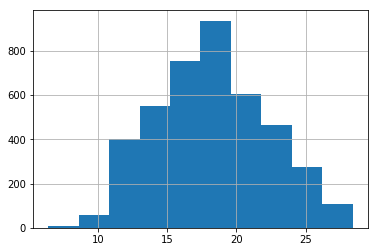

In [296]:
X_train['Mileage_kmpl'].hist()

# Final Mileage Formatting Function

In [297]:
def mileage_format(X, mean):
    mileage_df = X['Mileage'].str.split(" ", expand = True)
    
    #Adding two columns
    mileage_df['Mileage_kmpl'] = np.nan
    mileage_df['Mileage_km/kg'] = np.nan

    #Filling these two columns
    mileage_df.loc[mileage_df[1]=='kmpl', 'Mileage_kmpl'] = mileage_df.loc[mileage_df[1] == 'kmpl', 0]
    mileage_df.loc[mileage_df[1]=='km/kg', 'Mileage_km/kg'] = mileage_df.loc[mileage_df[1] == 'km/kg', 0]
    
    #merging these two
    mileage_df.drop([0,1], axis = 'columns', inplace = True)
    X_new = pd.concat([X, mileage_df], axis = 'columns')
    
    #Deleting extra columns
    X_new.drop('Mileage', axis = 'columns', inplace = True)
    
    #Converting to float
    X_new[['Mileage_kmpl', 'Mileage_km/kg']] = X_new[['Mileage_kmpl', 'Mileage_km/kg']].astype(float)
    
    #Missing value to average
    X_new.loc[X_new['Mileage_kmpl'] == 0.0, 'Mileage_kmpl'] = mean
    
    return X_new

# 2. Engine Feature

In [298]:
X_train[X_train['Engine'].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,18.017166,NaN
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,NaN,NaN,NaN,NaN,18.017166,NaN
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN


In [299]:
X_train['Engine'].isnull().sum()

23

In [300]:
engine_df = X_train['Engine'].str.split(" CC", expand = True)

In [301]:
engine_df.head()

,0,1
523,624,
5989,1968,
4565,1199,
538,1399,
253,1199,


In [302]:
engine_df[0] = engine_df[0].astype(float)

In [303]:
engine_df.head()

,0,1
523,624.0,
5989,1968.0,
4565,1199.0,
538,1399.0,
253,1199.0,


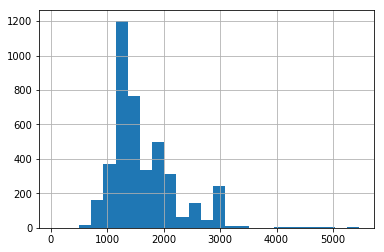

In [304]:
engine_df[0].hist(bins=25)

### Some Outliers seem to be present in Engine

In [305]:
X_train[engine_df[0] > 3000].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,5204 CC,560 bhp,2.0,NaN,6.40,NaN
3341,BMW 7 Series 2007-2012 750Li,Kochi,2010,50161,Petrol,Automatic,First,4395 CC,402 bhp,5.0,NaN,8.77,NaN
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,5461 CC,421 bhp,2.0,NaN,12.00,NaN
5416,Land Rover Range Rover Vogue SE 4.4 SDV8,Coimbatore,2013,75995,Diesel,Automatic,Second,4367 CC,335.3 bhp,5.0,NaN,11.49,NaN
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,3436 CC,null bhp,2.0,NaN,9.00,NaN


**Comment: NOT an Outlier. Engine Power above 3000 CC are luxury cars. Hence DOES affect Price**

In [306]:
engine_df['log_transform'] = np.log(1 + engine_df[0].values)

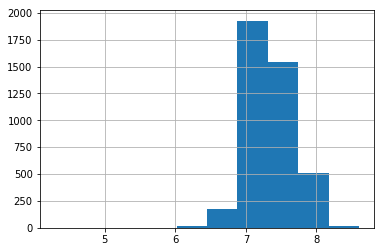

In [307]:
engine_df['log_transform'].hist()

In [308]:
engine_df['log_transform'].describe()

count    4190.000000
mean        7.331936
std         0.341278
min         4.290459
25%         7.089243
50%         7.309212
75%         7.596894
max         8.605570
Name: log_transform, dtype: float64

In [309]:
X_train[engine_df['log_transform'].isnull()].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,18.017166,NaN
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,NaN,NaN,NaN,NaN,18.017166,NaN
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,NaN,NaN,NaN,NaN,16.100000,NaN


In [310]:
engine_df['log_transform'].fillna(engine_df['log_transform'].mean(), inplace = True)

In [311]:
engine_df['log_transform'].isnull().any()

False

In [312]:
engine_mean = engine_df['log_transform'].mean()

## Engine Feature Transfromation Function

In [313]:
def engine_transform(X, mean):
    #Splitting into float values
    engine_df = X['Engine'].str.split(" CC", expand = True)
    
    #Convert to float
    engine_df[0] = engine_df[0].astype(float)
    
    #Log transform feature
    engine_df['Engine_log'] = np.log(1 + engine_df[0].values)
    
    #Inputting missing feature
    engine_df['Engine_log'].fillna(mean, inplace = True)
    
    #Merging columns
    X = pd.concat([X, engine_df], axis = 'columns')
    
    #Deleting useless features
    X.drop([0,1, 'Engine'], axis = 'columns', inplace = True)
    
    return X

In [314]:
X_train = engine_transform(X_train, engine_mean)

In [315]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg,Engine_log
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,37.5 bhp,4.0,NaN,25.40,NaN,6.437752
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,187.74 bhp,5.0,53.14 Lakh,18.25,NaN,7.585281
4565,Chevrolet Beat LT,Delhi,2010,54000,Petrol,Manual,Second,76.8 bhp,5.0,NaN,17.80,NaN,7.090077
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2012,107000,Diesel,Manual,First,67 bhp,5.0,NaN,17.80,NaN,7.244228
253,Honda Jazz 1.2 VX i VTEC,Coimbatore,2017,49575,Petrol,Manual,First,88.7 bhp,5.0,NaN,18.70,NaN,7.090077


In [316]:
X_train['Engine_log'].isnull().any()

False

# 3. Power Feature

In [317]:
power_df = X_train['Power'].str.split(" bhp", expand = True)[0]

In [318]:
power_df.head()

523       37.5
5989    187.74
4565      76.8
538         67
253       88.7
Name: 0, dtype: object

In [319]:
#Some values contains the value null: Making it NaN
power_df[power_df == 'null'] = np.nan

In [320]:
#Converting to float
power_df = power_df.astype(float)

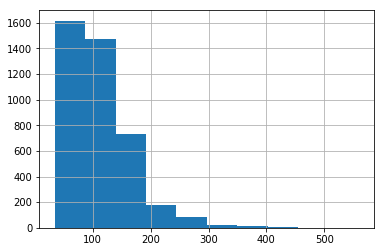

In [321]:
power_df.hist()

**Comment** Highly right skew

In [322]:
X_train[power_df > 300].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,New_Price,Mileage_kmpl,Mileage_km/kg,Engine_log
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,560 bhp,2.0,NaN,6.40,NaN,8.557375
3341,BMW 7 Series 2007-2012 750Li,Kochi,2010,50161,Petrol,Automatic,First,402 bhp,5.0,NaN,8.77,NaN,8.388450
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,421 bhp,2.0,NaN,12.00,NaN,8.605570
5416,Land Rover Range Rover Vogue SE 4.4 SDV8,Coimbatore,2013,75995,Diesel,Automatic,Second,335.3 bhp,5.0,NaN,11.49,NaN,8.382061
1741,BMW X6 xDrive 40d,Hyderabad,2013,58000,Diesel,Automatic,First,306 bhp,4.0,NaN,11.20,NaN,8.004366


**Comment: Power above 300 bhp are luxury cars. Not outliers**

In [323]:
power_log = np.log(1 + power_df)

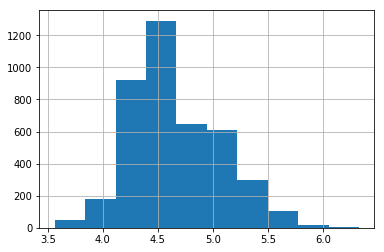

In [324]:
power_log.hist()

In [325]:
power_log.describe()

count    4120.000000
mean        4.652526
std         0.416003
min         3.561046
25%         4.330733
50%         4.553877
75%         4.948760
max         6.329721
Name: 0, dtype: float64

In [326]:
power_mean = power_log.mean()

In [327]:
power_mean

4.6525256102222885

## Power Feature Final Transformation

In [328]:
def power_transform(X, mean):
    
    #Splitting
    power_df = X_train['Power'].str.split(" bhp", expand = True)[0]
    
    #Some values contains the value null: Making it NaN
    power_df[power_df == 'null'] = np.nan
    
    #Converting to float
    power_df = power_df.astype(float)
    
    #Log transformation
    power_log = np.log(1 + power_df)
    
    #Missing value
    power_log.fillna(mean, inplace = True)
    
    #Merging
    X['Power_log'] = power_log
    
    #Deleteing
    X.drop('Power', axis='columns', inplace = True)
    
    return X

In [329]:
X_train = power_transform(X_train, power_mean)

In [330]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_kmpl,Mileage_km/kg,Engine_log,Power_log
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,4.0,NaN,25.40,NaN,6.437752,3.650658
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,5.0,53.14 Lakh,18.25,NaN,7.585281,5.240370
4565,Chevrolet Beat LT,Delhi,2010,54000,Petrol,Manual,Second,5.0,NaN,17.80,NaN,7.090077,4.354141
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2012,107000,Diesel,Manual,First,5.0,NaN,17.80,NaN,7.244228,4.219508
253,Honda Jazz 1.2 VX i VTEC,Coimbatore,2017,49575,Petrol,Manual,First,5.0,NaN,18.70,NaN,7.090077,4.496471


In [331]:
X_train['Power_log'].isnull().any()

False

## 4. Seats Feature 

In [332]:
X_train['Seats'].value_counts()

5.0     3520
7.0      461
8.0       93
4.0       69
6.0       21
2.0       14
10.0       4
9.0        3
Name: Seats, dtype: int64

In [333]:
def seat_transform(X, mode):
    X['Seats'].fillna(mode, inplace = True)
    return X

In [334]:
X_train = seat_transform(X_train, 5.0)

In [335]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Mileage_kmpl,Mileage_km/kg,Engine_log,Power_log
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,4.0,NaN,25.40,NaN,6.437752,3.650658
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,5.0,53.14 Lakh,18.25,NaN,7.585281,5.240370
4565,Chevrolet Beat LT,Delhi,2010,54000,Petrol,Manual,Second,5.0,NaN,17.80,NaN,7.090077,4.354141
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2012,107000,Diesel,Manual,First,5.0,NaN,17.80,NaN,7.244228,4.219508
253,Honda Jazz 1.2 VX i VTEC,Coimbatore,2017,49575,Petrol,Manual,First,5.0,NaN,18.70,NaN,7.090077,4.496471


## 5. New Price Feature

In [336]:
X_train['New_Price'].isnull().sum()

3637

In [337]:
X_train.drop('New_Price', axis = 'columns', inplace = True)

In [338]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Mileage_km/kg,Engine_log,Power_log
523,Tata Nano Twist XT,Ahmedabad,2014,18000,Petrol,Manual,Second,4.0,25.40,NaN,6.437752,3.650658
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,5.0,18.25,NaN,7.585281,5.240370
4565,Chevrolet Beat LT,Delhi,2010,54000,Petrol,Manual,Second,5.0,17.80,NaN,7.090077,4.354141
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,2012,107000,Diesel,Manual,First,5.0,17.80,NaN,7.244228,4.219508
253,Honda Jazz 1.2 VX i VTEC,Coimbatore,2017,49575,Petrol,Manual,First,5.0,18.70,NaN,7.090077,4.496471


## 6. Year Feature

**The Correlation between year and Price**

In [339]:
np.corrcoef(X_train['Year'].values, y_train)

array([[1.        , 0.30163984],
       [0.30163984, 1.        ]])

## 7. Name Feature

In [340]:
names = X_train['Name'].str.split().str.get(0)+' '+X_train['Name'].str.split().str.get(1)

In [341]:
names.head()

523          Tata Nano
5989           Audi A4
4565    Chevrolet Beat
538        Ford Fiesta
253         Honda Jazz
Name: Name, dtype: object

In [342]:
len(np.unique(names))

207

In [343]:
np.unique(names)

array(['Audi A3', 'Audi A4', 'Audi A6', 'Audi A7', 'Audi A8', 'Audi Q3',
       'Audi Q5', 'Audi Q7', 'Audi RS5', 'Audi TT', 'BMW 1', 'BMW 3',
       'BMW 5', 'BMW 6', 'BMW 7', 'BMW X1', 'BMW X3', 'BMW X5', 'BMW X6',
       'BMW Z4', 'Chevrolet Aveo', 'Chevrolet Beat', 'Chevrolet Captiva',
       'Chevrolet Cruze', 'Chevrolet Enjoy', 'Chevrolet Optra',
       'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tavera',
       'Datsun GO', 'Datsun redi-GO', 'Fiat Avventura', 'Fiat Grande',
       'Fiat Linea', 'Fiat Petra', 'Fiat Punto', 'Fiat Siena',
       'Force One', 'Ford Aspire', 'Ford Classic', 'Ford EcoSport',
       'Ford Ecosport', 'Ford Endeavour', 'Ford Fiesta', 'Ford Figo',
       'Ford Freestyle', 'Ford Fusion', 'Ford Ikon', 'Ford Mustang',
       'Honda Accord', 'Honda Amaze', 'Honda BR-V', 'Honda BRV',
       'Honda Brio', 'Honda CR-V', 'Honda City', 'Honda Civic',
       'Honda Jazz', 'Honda Mobilio', 'Honda WR-V', 'Honda WRV',
       'Hyundai Accent', 'Hyundai Creta', 'Hyu

In [344]:
first_name = X_train['Name'].str.split().str.get(0)

In [345]:
len(np.unique(first_name))

28

In [346]:
np.unique(first_name)

array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jeep', 'Lamborghini',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [347]:
def format_names(X):
    first_name = X['Name'].str.split().str.get(0)
    
    X['Name'] = first_name
    
    return X

In [348]:
X_train = format_names(X_train)

In [349]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Mileage_km/kg,Engine_log,Power_log
523,Tata,Ahmedabad,2014,18000,Petrol,Manual,Second,4.0,25.40,NaN,6.437752,3.650658
5989,Audi,Coimbatore,2013,58629,Diesel,Automatic,Second,5.0,18.25,NaN,7.585281,5.240370
4565,Chevrolet,Delhi,2010,54000,Petrol,Manual,Second,5.0,17.80,NaN,7.090077,4.354141
538,Ford,Hyderabad,2012,107000,Diesel,Manual,First,5.0,17.80,NaN,7.244228,4.219508
253,Honda,Coimbatore,2017,49575,Petrol,Manual,First,5.0,18.70,NaN,7.090077,4.496471


# 8. Owner Type Feature

In [350]:
np.unique(X_train['Owner_Type'].values)

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object)

In [351]:
def owner_transform(X):
    
    mapp = {'First':1,
           'Second':2,
           'Third':3,
           'Fourth & Above':4}
    
    X['Owner_Type'] = X['Owner_Type'].map(mapp)
    
    return X

In [352]:
X_train = owner_transform(X_train)

In [353]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Mileage_km/kg,Engine_log,Power_log
523,Tata,Ahmedabad,2014,18000,Petrol,Manual,2,4.0,25.40,NaN,6.437752,3.650658
5989,Audi,Coimbatore,2013,58629,Diesel,Automatic,2,5.0,18.25,NaN,7.585281,5.240370
4565,Chevrolet,Delhi,2010,54000,Petrol,Manual,2,5.0,17.80,NaN,7.090077,4.354141
538,Ford,Hyderabad,2012,107000,Diesel,Manual,1,5.0,17.80,NaN,7.244228,4.219508
253,Honda,Coimbatore,2017,49575,Petrol,Manual,1,5.0,18.70,NaN,7.090077,4.496471


## 9. Kilometres Driven

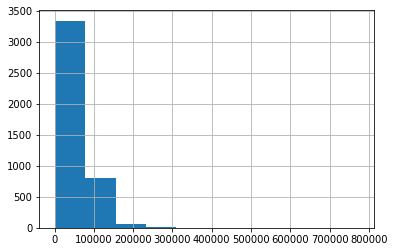

In [362]:
X_train['Kilometers_Driven'].hist()

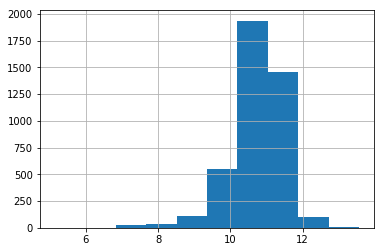

In [363]:
np.log(X_train['Kilometers_Driven']).hist()

In [364]:
def kilometers_transform(X):
    X['Kilometers_Driven'] = np.log(X['Kilometers_Driven'])
    
    return X